# StegoPack - Analysis

In [1]:
# Import main library
from StegoPack import Image, Payload

In [2]:
# Helper functions to demo via Jupyter Notebook

import os
from os.path import join as dirPath
baseDir = "demo_files"
payloadsDir = dirPath(baseDir, "payloads")
encodedDir = dirPath(baseDir, "encoded")
        
import imageio
import matplotlib.pyplot as plt
def pltshow(a, b=None, dim=(1,1)):
    plt.figure(figsize=(20 * dim[0]/dim[1], 20))
    plt.subplots_adjust(left=.01, bottom=.01, right=.99, top=.99, wspace=.1, hspace=.1)
    
    plt.subplot(121)
    plt.imshow(imageio.imread(a))
    plt.axis("off")
    if b:
        plt.subplot(122)
        plt.imshow(imageio.imread(b))
        plt.axis("off")
    plt.show()

# Create demo subdirectory
try: os.mkdir(encodedDir)
except: pass

## "Worst-Case Scenario" Demo

Image: `randall-2560x1372.png`

Payload: `payloads/pier39.mp4`

Output (Image with payload): `encoded/randall-L2.png`

Fill with random noise: `False`

'demo_files\randall-2560x1372.png' has file size 1.2 MB and dimensions 1372x2560 (3512320 pixels).
Payload storage capacities (including payload header):
  Level 0: up to 1.3 MB
  Level 1: 1.3 MB to 2.5 MB
  Level 2: 2.5 MB to 5.0 MB
'pier39.mp4' needs 3.2 MB of payload storage.
Encoding 'pier39.mp4' into 'demo_files\randall-2560x1372.png' using L2...
File 'pier39.mp4' found encoded as L2!
Decoding...


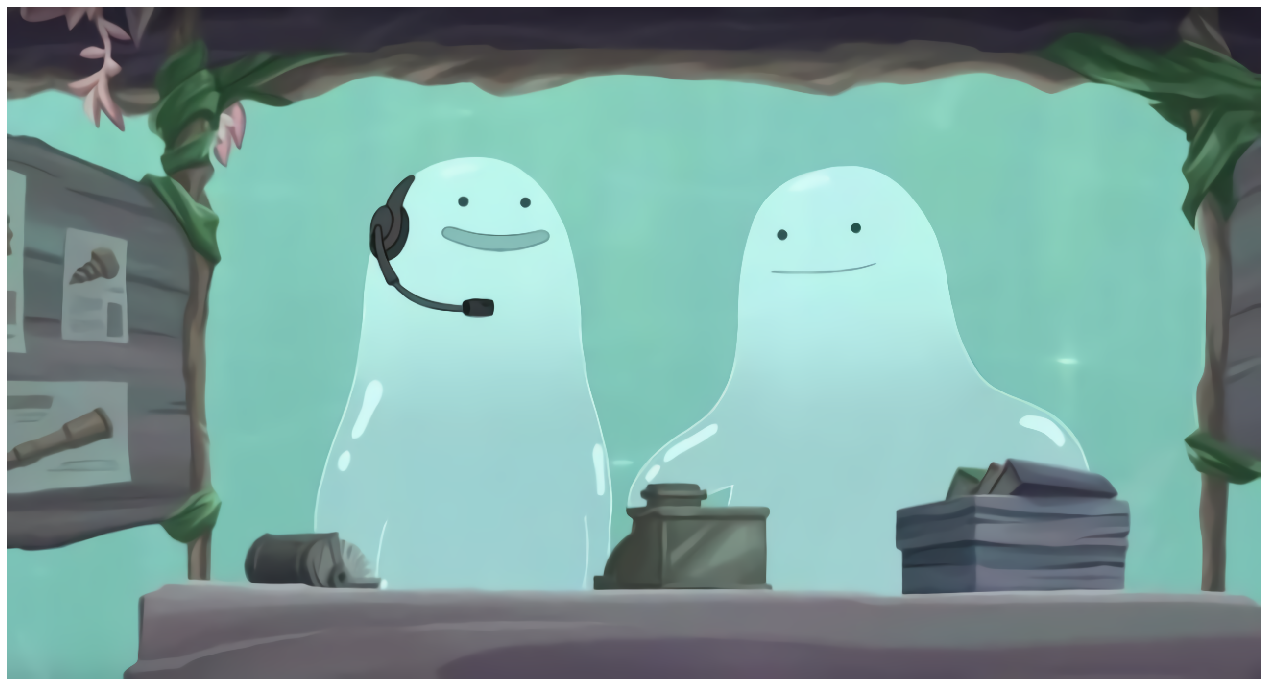

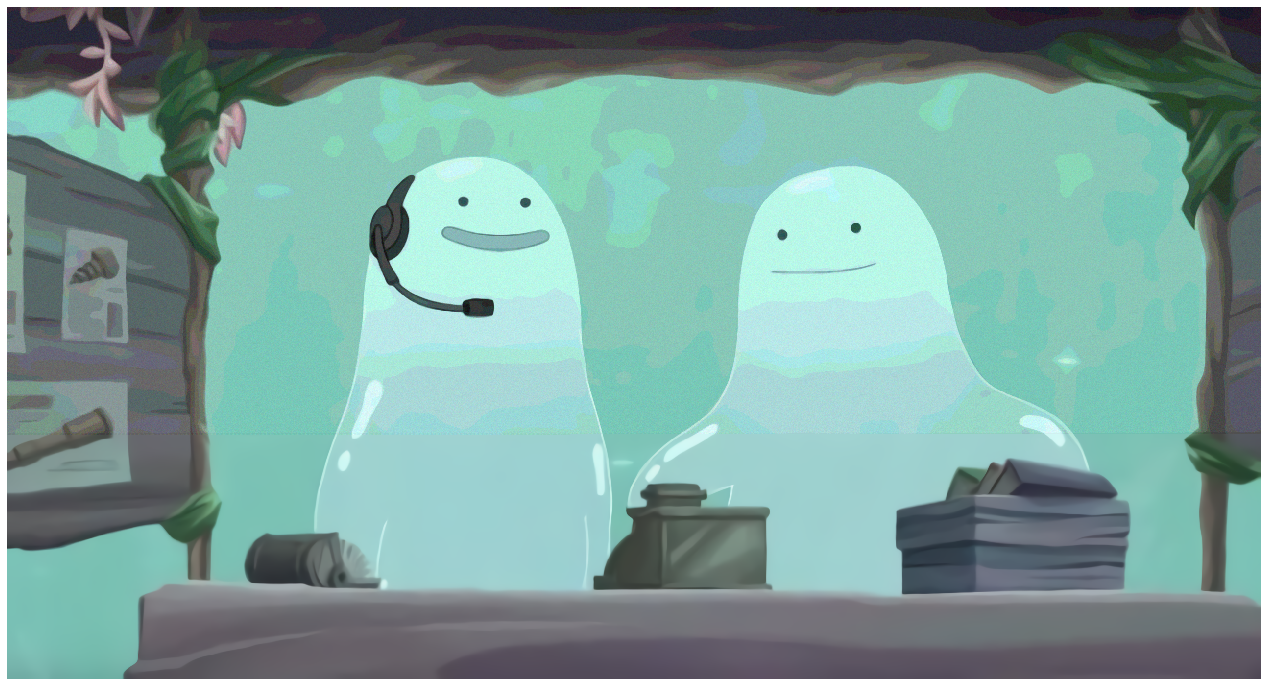

In [3]:
image = Image(dirPath(baseDir, "randall-2560x1372.png"))
image.printInfo()

payload = Payload(dirPath(payloadsDir, "pier39.mp4"))
payload.printInfo()

# Encoding
image.encodePayload(payload)
image.saveFile(dirPath(encodedDir, "randall-L2.png"))

# Decoding
image = Image(dirPath(encodedDir, "randall-L2.png"))
payload = image.decodePayload()
# payload.saveFile()

pltshow(dirPath(baseDir, "randall-2560x1372.png"), dim=(image.height, image.width))
pltshow(dirPath(encodedDir, "randall-L2.png"), dim=(image.height, image.width))